# バンディット問題

In [ ]:
import numpy as np
np.random.seed(0)

n_arms=4

class Env(object):
  thetas = [0.1, 0.1, 0.2, 0.3]

  def react(arm):
    #return 1 if np.random.random() < Env.thetas[arm] else 0
    if np.random.random() < Env.thetas[arm]:
      return 1
    else:
       return 0
  def opt():
    return np.argmax(Env.thetas)


In [ ]:
def sim(Agent, N=1000, T=1000, **kwargs):
  selected_arms = [[0 for _ in range(T)] for _ in range(N)]
  earned_rewards = [[0 for _ in range(T)] for _ in range(N)]

  for n in range(N):
    agent = Agent(**kwargs)
    for t in range(T):
      arm = agent.get_arm()
      reward = Env.react(arm)
      agent.sample(arm,reward)
      selected_arms[n][t] = arm
      earned_rewards[n][t] = reward
  return np.array(selected_arms), np.array(earned_rewards)

#  ε- greedy

In [ ]:
class EpsilonGredyAgent(object):

  def __init__(self, epsilon=0.1):
    self.epsilon = epsilon
    self.counts = np.zeros(n_arms)
    self.values = np.zeros(n_arms)
  def get_arm(self):
    if np.random.random() < self.epsilon:
      arm = np.random.randint(n_arms)
    else:
      arm = np.argmax(self.values)
    return arm
  def sample(self, arm, reward):
    self.counts[arm] += 1
    self.values[arm] = (
        (self.counts[arm] - 1) * self.values[arm] + reward
        ) / self.counts[arm]

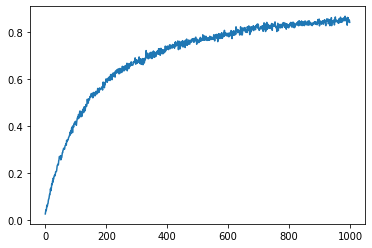

In [ ]:
arms_eg, rewards_eg = sim(EpsilonGredyAgent)
acc = np.mean(arms_eg == Env.opt(), axis=0)

plt.plot(acc)
plt.show()

# 焼きなましε- greedy

In [ ]:
class AnnealingEpsilonGreedyAgent(object):
  def __init__(self, epsilon=1.0):
    self.epsilon = epsilon
    self.counts = np.zeros(n_arms)
    self.values = np.zeros(n_arms)

  def get_arm(self):
    if np.random.random() < self.epsilon:
      arm = np.random.randint(n_arms)
    else:
      arm = np.argmax(self.values)
    self.epsilon *= 0.99
    return arm
  def sample(self, arm, reward):
    self.counts[arm] += 1
    self.values[arm] = (
        (self.counts[arm] -1) *self.values[arm] + reward
    ) / self.counts[arm]

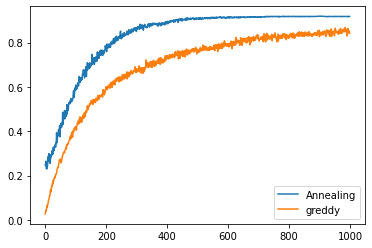

In [ ]:
arms_aeg, rewards_eg = sim(AnnealingEpsilonGreedyAgent)

plt.plot(np.mean(arms_aeg == Env.opt(),axis=0),
         label=r'Annealing')
plt.plot(np.mean(arms_eg == Env.opt(),axis=0),
         label='greddy')
plt.legend()
plt.show()

# Thompson sampling

In [ ]:
class BeruoulliTSAgent(object):

  def __init__(self):
    self.counts = [0 for _ in range(n_arms)]
    self.wins = [0 for _ in range(n_arms)]
  
  def get_arm(self):
    beta = lambda N, a: np.random.beta(a + 1, N -a +1)
    result = [beta(self.counts[i],self.wins[i]) for i in range(n_arms)]
    arm = result.index(max(result))
    return arm

  def sample(self, arm, reward):
    self.counts[arm] = self.counts[arm] + 1
    self.wins[arm] = self.wins[arm] + reward

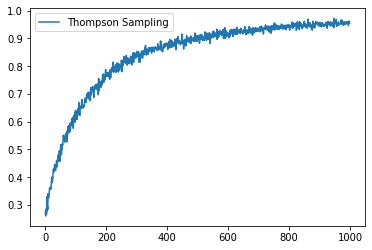

In [ ]:
arms_ts, rewards_ts = sim(BeruoulliTSAgent)

plt.plot(np.mean(arms_ts == Env.opt(), axis=0),
     label='Thompson Sampling')
plt.legend()
plt.show()

# UCBアルゴリズム

In [ ]:
class UCBAgent(object):
  def __init__ (self):
    self.counts = [0 for _ in range(n_arms)]
    self.values = [0 for _ in range(n_arms)]

  def calc_ucb(self,arm):
    ucb = self.values[arm]
    ucb += np.sqrt(np.log(sum(self.counts)) / (2 * self.counts[arm]))
    return ucb

  def get_arm(self):
    if 0 in self.counts:
      arm = self.counts.index(0)
    else:
      ucb = [self.calc_ucb(arm) for arm in range(n_arms)]
      arm = ucb.index(max(ucb))
    return arm
  
  def sample(self, arm, reward):
    self.counts[arm] = self.counts[arm] + 1
    self.values[arm] = (
        (self.counts[arm] - 1) * self.values[arm] + reward
    ) / self.counts[arm]

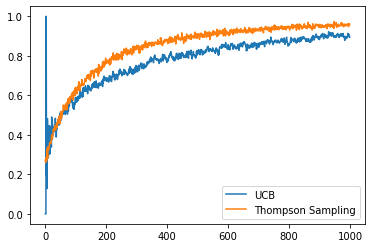

In [ ]:
arms_ucb, rewards_ucb = sim(UCBAgent)

plt.plot(np.mean(arms_ucb == Env.opt(), axis=0), label='UCB')
plt.plot(np.mean(arms_ts == Env.opt(), axis=0),
         label='Thompson Sampling')

plt.legend()
plt.show()